In [145]:
# prerequisites
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image

bs = 100
# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transforms.ToTensor(), download=False)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

In [146]:
class AE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        super(AE, self).__init__()
        
        # encoder part
        self.fc1 = nn.Linear(x_dim, h_dim1)
        self.fc2 = nn.Linear(h_dim1, h_dim2)
        self.fc3 = nn.Linear(h_dim2, z_dim)
        # decoder part
        self.fc4 = nn.Linear(z_dim, h_dim2)
        self.fc5 = nn.Linear(h_dim2, h_dim1)
        self.fc6 = nn.Linear(h_dim1, x_dim)
        
    def encoder(self, x):
        h = F.relu(self.fc1(x))
        h = F.relu(self.fc2(h))
        return self.fc3(h)
    
    def decoder(self, x):
        h = F.relu(self.fc4(x))
        h = F.relu(self.fc5(h))
        return F.sigmoid(self.fc6(h)) 
    
    def forward(self, x):
        x = self.encoder(x.view(-1, 784))
        return self.decoder(x)

# build model
ae = AE(x_dim=784, h_dim1= 512, h_dim2=256, z_dim=2)
if torch.cuda.is_available():
    ae.cuda()

In [6]:
class AE1(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
            self.conv1=nn.Conv2d(1, 32, 3,stride=1,padding=1)
            self.conv2=nn.Conv2d(32, 64, 4,stride=2,padding=1)
            self.conv3=nn.Conv2d(64, 64, 3,stride=1,padding=1)
            self.linear1=nn.Linear(3136,2)
            self.relu=nn.LeakyReLU()
            self.linear2=nn.Linear(2,3136)
            self.conv1T=nn.ConvTranspose2d(64, 64, 3,1,1)
            self.conv2T=nn.ConvTranspose2d(64, 64,4,2,1)
            self.conv3T=nn.Conv2d(64, 32, 3,stride=1,padding=1)
    
    def encoder(self, x):
        h = F.relu(self.conv1(x))
        h = F.relu(self.conv2(x))
        h = F.relu(self.conv3(x))
        h=h.view(h.size(0),-1)
        return self.linear1(h)

     def decoder(self, x):
        h= self.linear2(x)
        h= h.view(h.size(0),64,7,7)
        h = F.relu(self.conv1T(h))
        h = F.relu(self.conv2T(h))
        h=
        
        h = F.relu(self.fc5(h))
        return F.sigmoid(self.fc6(h)) 
        
        return x


net = Net()
# build model
ae = AE(x_dim=784, h_dim1= 512, h_dim2=256, z_dim=2)
if torch.cuda.is_available():
    ae.cuda()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 22)

In [147]:
ae

AE(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
  (fc4): Linear(in_features=2, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=784, bias=True)
)

In [148]:
optimizer = optim.Adam(ae.parameters())
def loss_function(recon_x, x):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')
    return BCE

In [149]:
def train(epoch):
    ae.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()
        
        recon_batch = ae(data)
        loss = loss_function(recon_batch, data)
        
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, train_loss / len(train_loader.dataset)))

In [150]:
def test():
    ae.eval()
    test_loss= 0
    with torch.no_grad():
        for data, _ in test_loader:
            recon= ae(data)
            
            # sum up batch loss
            test_loss += loss_function(recon, data).item()
        
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

In [151]:
for epoch in range(1, 30):
    train(epoch)
    test()

/home/aditya/.local/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000 (0%)]	Loss: 544.208242
Train Epoch: 1 [10000/60000 (17%)]	Loss: 181.298008
Train Epoch: 1 [20000/60000 (33%)]	Loss: 162.235830
Train Epoch: 1 [30000/60000 (50%)]	Loss: 154.332383
Train Epoch: 1 [40000/60000 (67%)]	Loss: 154.179541
Train Epoch: 1 [50000/60000 (83%)]	Loss: 161.861631
====> Epoch: 1 Average loss: 169.9846
====> Test set loss: 151.8414
Train Epoch: 2 [0/60000 (0%)]	Loss: 147.711133
Train Epoch: 2 [10000/60000 (17%)]	Loss: 143.235576
Train Epoch: 2 [20000/60000 (33%)]	Loss: 150.218232
Train Epoch: 2 [30000/60000 (50%)]	Loss: 146.672764
Train Epoch: 2 [40000/60000 (67%)]	Loss: 143.837920
Train Epoch: 2 [50000/60000 (83%)]	Loss: 146.004541
====> Epoch: 2 Average loss: 148.3199
====> Test set loss: 145.5063
Train Epoch: 3 [0/60000 (0%)]	Loss: 138.368604
Train Epoch: 3 [10000/60000 (17%)]	Loss: 149.184014
Train Epoch: 3 [20000/60000 (33%)]	Loss: 139.582305
Train Epoch: 3 [30000/60000 (50%)]	Loss: 146.165332
Train Epoch: 3 [40000/60000 (67%)]	Loss: 143.61

Train Epoch: 22 [50000/60000 (83%)]	Loss: 123.017441
====> Epoch: 22 Average loss: 129.6341
====> Test set loss: 131.8127
Train Epoch: 23 [0/60000 (0%)]	Loss: 132.439365
Train Epoch: 23 [10000/60000 (17%)]	Loss: 129.782627
Train Epoch: 23 [20000/60000 (33%)]	Loss: 127.006299
Train Epoch: 23 [30000/60000 (50%)]	Loss: 127.227129
Train Epoch: 23 [40000/60000 (67%)]	Loss: 133.315078
Train Epoch: 23 [50000/60000 (83%)]	Loss: 134.304346
====> Epoch: 23 Average loss: 129.2838
====> Test set loss: 131.2116
Train Epoch: 24 [0/60000 (0%)]	Loss: 125.733242
Train Epoch: 24 [10000/60000 (17%)]	Loss: 129.168398
Train Epoch: 24 [20000/60000 (33%)]	Loss: 132.740713
Train Epoch: 24 [30000/60000 (50%)]	Loss: 133.338701
Train Epoch: 24 [40000/60000 (67%)]	Loss: 124.061025
Train Epoch: 24 [50000/60000 (83%)]	Loss: 123.613281
====> Epoch: 24 Average loss: 129.0185
====> Test set loss: 131.0088
Train Epoch: 25 [0/60000 (0%)]	Loss: 127.857168
Train Epoch: 25 [10000/60000 (17%)]	Loss: 126.863994
Train Epoch: 

In [152]:
with torch.no_grad():
    z = torch.randn(64, 2)
    sample = ae.decoder(z)
    
    save_image(sample.view(64, 1, 28, 28), './samples/sample1_' + '.png')

In [153]:
import matplotlib.pyplot as plt
import numpy as np

In [154]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(train_dataset)), n_to_show)


In [155]:
final_points=np.array([[0,0]])

In [156]:
labels=np.array([0])

In [157]:
for i in example_idx:
    example_images,example_labels =train_dataset[i]
    example_images=example_images.view(-1,784)
    z_points = ae.encoder(example_images)
    z_points=z_points.detach().numpy()
    final_points=np.vstack((final_points,z_points))
    labels=np.vstack((labels,example_labels))

In [158]:
labels=labels.ravel()

In [159]:
labels.shape

(5001,)

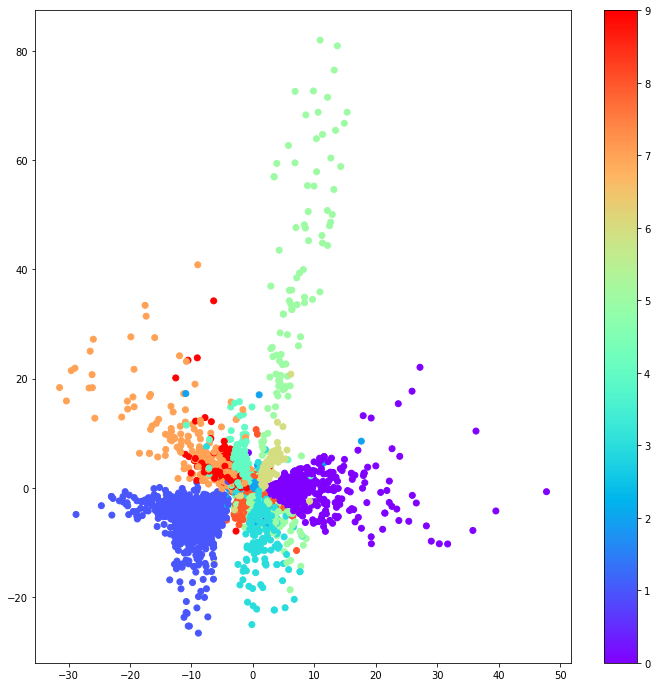

In [161]:
plt.figure(figsize=(figsize, figsize))
plt.scatter(final_points[:, 0] , final_points[:, 1] , cmap='rainbow',c=labels)
plt.colorbar()
plt.show()

In [162]:
final_points=np.array([[0,0]])

In [163]:
labels=np.array([0])

In [165]:
n_to_show = 5000
grid_size = 15
figsize = 12

example_idx = np.random.choice(range(len(test_dataset)), n_to_show)


In [166]:
for i in example_idx:
    example_images,example_labels =test_dataset[i]
    example_images=example_images.view(-1,784)
    z_points = ae.encoder(example_images)
    z_points=z_points.detach().numpy()
    final_points=np.vstack((final_points,z_points))
    labels=np.vstack((labels,example_labels))

In [168]:
labels=labels.ravel()

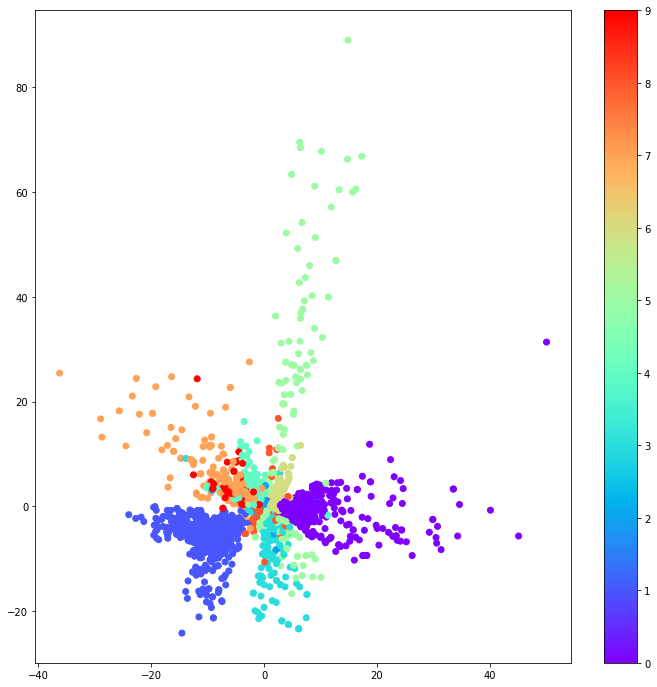

In [169]:
plt.figure(figsize=(figsize, figsize))
plt.scatter(final_points[:, 0] , final_points[:, 1] , cmap='rainbow',c=labels)
plt.colorbar()
plt.show()